# *Extraction and formatting data from Losanna Spike II dataset*

In [1]:
import os
from pandas import *
import numpy as np
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime as datetime
from timeseries_writer import *
oms_project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(oms_project_path+"/data/SpikeII/SpikeIIOriginalDataset")
os.listdir()

['spike.hydrometric.II.csv',
 '.DS_Store',
 'hydrologic_fluxes.csv',
 'events_chronology.csv',
 'METADATA_spike.II.txt',
 'fineroots_spike.II.csv',
 'Figure1_SpikeII_Aerial_Image.png',
 'spike.isotope.II.csv',
 'hydrologic_fluxes.dat']

### Open dataset

In [3]:
data = pd.read_csv('spike.hydrometric.II.csv')
data.head()

,TIMESTAMP,Date,pF25,pF75,pF125,pF175,vwcA25,vwcB25,vwcA75,vwcC75,...,SR.N,SR.SE,SR.SW,GRO,TWD,T.rates,ET,ET_1,ET_3,ET_4
0,2018-05-10 0:00,2018-05-10,1.452,1.285,2.396,2.387,0.17,0.2,0.21,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0000,NaN,0.0
1,2018-05-10 0:15,2018-05-10,1.452,1.294,2.395,2.383,0.17,0.2,0.21,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0000,NaN,0.0
2,2018-05-10 0:30,2018-05-10,1.453,1.293,2.394,2.378,0.17,0.2,0.21,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0000,NaN,0.0
3,2018-05-10 0:45,2018-05-10,1.464,1.302,2.392,2.372,0.17,0.2,0.21,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0023,NaN,0.0
4,2018-05-10 1:00,2018-05-10,1.459,1.299,2.391,2.368,0.17,0.2,0.21,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0090,NaN,0.0


In [4]:
data.columns

Index(['TIMESTAMP', 'Date', 'pF25', 'pF75', 'pF125', 'pF175', 'vwcA25',
       'vwcB25', 'vwcA75', 'vwcC75', 'vwcA125', 'vwcB125', 'vwcB175',
       'vwcC175', 'Air.Temp', 'VPD', 'Solar.Rad', 'Wind.Speed', 'Rel.Hum',
       'Precip.', 'Irrig.', 'Storage', 'Leakage', 'SR.av', 'SR.N', 'SR.SE',
       'SR.SW', 'GRO', 'TWD', 'T.rates', 'ET', 'ET_1', 'ET_3', 'ET_4'],
      dtype='object')

In [5]:
#new_data=data.assign(Precip_Irrig = data['Precip.'] + data['Irrig.'])
#new_data

### Extracting dataset

In [16]:
df=data[['TIMESTAMP','Irrig.']]
df.head()

,TIMESTAMP,Irrig.
0,2018-05-10 0:00,0.0
1,2018-05-10 0:15,0.0
2,2018-05-10 0:30,0.0
3,2018-05-10 0:45,0.0
4,2018-05-10 1:00,0.0


In [17]:
#new_data.to_csv('New_dataframe.csv')

In [18]:
name = 'Irrig'
name_file = name+'.csv'

In [19]:
df.insert(loc=0, column='-', value=np.nan)
df.head()

,-,TIMESTAMP,Irrig.
0,NaN,2018-05-10 0:00,0.0
1,NaN,2018-05-10 0:15,0.0
2,NaN,2018-05-10 0:30,0.0
3,NaN,2018-05-10 0:45,0.0
4,NaN,2018-05-10 1:00,0.0


In [20]:
os.chdir(oms_project_path+"/data/SpikeII")

In [21]:
ID_basin = 1

In [22]:
write_timeseries_csv(df,name_file,ID_basin)



***SUCCESS writing!  Irrig.csv


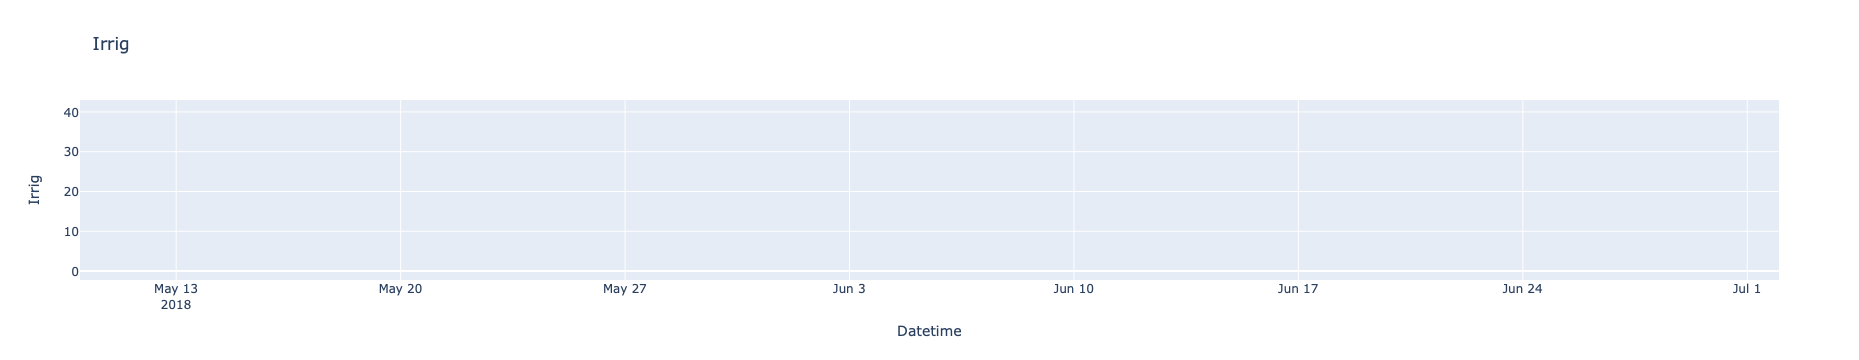

In [23]:
df2 = pd.read_csv(name_file,skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime',name]
fig = px.line(df2, x='Datetime', y = name, title = name)
fig.show()

In [ ]:
#controllo= new_data['Precip_Irrig'] - data['Precip.'] - data['Irrig.']
#print(controllo)